<a href="https://colab.research.google.com/github/SLCFLAB/FinTech2020/blob/master/Algorithm_Trading_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 1 복습

### 국내 주식 데이터 수집 : FinanceDatareader

In [0]:
!pip install -U finance-datareader

In [1]:
import FinanceDataReader as fdr
print(fdr.__version__)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cvxopt as opt
from cvxopt import solvers
import warnings

ModuleNotFoundError: ignored

In [0]:
symbols = ['KS200', 'US500', 'IXIC', 'JP225', 'USD/KRW']

a = {}
for symbol in symbols:
  a[symbol] = fdr.DataReader(symbol, '2010')['Close']

a = pd.DataFrame(a)

In [0]:
a

,KS200,US500,IXIC,JP225,USD/KRW
Date,,,,,
2010-01-01,NaN,NaN,NaN,NaN,1166.08
2010-01-04,223.49,1132.99,2308.42,10654.79,1150.00
2010-01-05,222.84,1136.52,2308.71,10681.83,1140.20
2010-01-06,224.67,1137.14,2301.09,10731.45,1129.20
2010-01-07,221.31,1141.69,2300.05,10681.66,1138.20
...,...,...,...,...,...
2020-04-13,243.40,2761.63,8192.42,19043.40,1215.96
2020-04-14,247.45,2846.06,8515.74,19638.81,1212.50
2020-04-15,NaN,2783.36,8393.18,19550.09,1224.72


#### Efficient Frontier 구하기

In [0]:
holding_periods=1
n_term=252 # dailiy return을 annualize
data = a

returns = data.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
exp_rets = returns.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat = returns.cov() * n_term # covariance
corr_mat = returns.corr() # corr

In [0]:
def mean_var_portfolio(cov_mat, exp_rets, target_ret):
    
        n = len(cov_mat)
        
        # Objective function
        # min (1/2)*w.T*P*w
        P = opt.matrix(cov_mat.values) 
        q = opt.matrix(0.0, (n, 1))
        
        
        # Constraints Gw <= h
        # exp_rets*w >= target_ret and w >= 0
        G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
        h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))
        
        # Constraints Aw = b
        # sum(w) = 1
        A = opt.matrix(1.0, (1, n))
        b = opt.matrix(1.0)
        
        # Solve
        solvers.options['show_progress'] = False
        sol = solvers.qp(P, q, G, h, A, b)
        
        # Put weights into a labeled series
        w = pd.Series(sol['x'], index=cov_mat.index)
        
        return w

In [0]:
max_risk=0.5
max_ret = exp_rets.max()
min_ret = exp_rets[exp_rets > 0].min()

n_step = 100
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat, exp_rets, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat), _w))
    
    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = np.dot(exp_rets, _w)
    rets.append(ret)

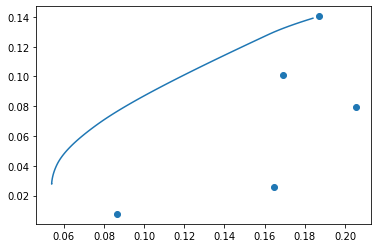

In [0]:
plt.plot(risks, rets)


var = np.diag(cov_mat)
plt.scatter(np.sqrt(var), exp_rets)

In [0]:
max_risk=0.5
max_ret = exp_rets.max()
min_ret = exp_rets[exp_rets > 0].min()

n_step = 1000
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat, exp_rets, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat), _w))

    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = np.dot(exp_rets, _w)
    rets.append(ret)

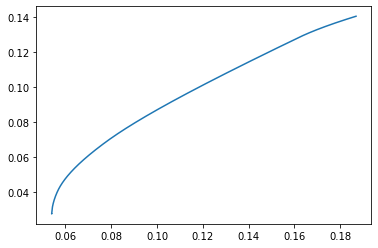

In [0]:
plt.plot(risks, rets)

# 최소 분산 포트폴리오
![](https://ift.world/wp-content/uploads/2018/06/wsi-imageoptim-1-1.png)

#### 최소 분산 포트폴리오 : 자산들로 구성되는 포트폴리오 중 최소 분산을 갖는 포트폴리오.
#### Efficient Frontier 상에서 분산이 가장 작은 점이 된다.

#실습 1

### 앞서 구한 Efficient Frontier를 바탕으로, Efficient frontier 상에서 variance가 가장 작은 점을 구하시오. 
#### A) 구한 minimum variance portfolio의 risk, return, portfolio weight를 프린트하시오.
#### B) Efficient frontier와 Minimum variance portfolio를 plotting하시오.

In [0]:
# Efficient Frontier

max_risk=0.5
max_ret = exp_rets.max()
min_ret = exp_rets[exp_rets > 0].min()

n_step = 1000
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []
weights = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat, exp_rets, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat), _w))

    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = np.dot(exp_rets, _w)
    rets.append(ret)
    weights.append(_w)

# ToDo  "???"
min_risk_idx = "???"
min_risk = "???"
min_risk_ret = "???"
min_risk_weight = "???"
print("Risk of minimum variance portfolio : ", min_risk)
print("Return of minimum variance portfolio : ", min_risk_ret)
print("Weight of minimum variance portfolio : ")
print(min_risk_weight)

# 탄젠시 포트폴리오

![대체 텍스트](https://www.researchgate.net/profile/Teodosii_Rachev/publication/24071755/figure/fig2/AS:667097013161996@1536059730503/The-Efficient-frontier-and-the-tangent-portfolio.png)

#### 앞서서는 주어진 자산들로 구성되는 포트폴리오들을 분석하여 efficient frontier를 구하고, minimum variance portfolio를 구하는 방법을 살펴보았다.
#### 이제 앞선 구성자산들에 더하여, risk-free asset이 존재할 시 어떤 portfolio들을 만들 수 있는 지 알아보자.
#### Risk free asset : 한국의 경우 국고채 3년 금리 사용 --> 1%
#### Efficient frontier 상의 포트폴리오 중, Sharpe ratio가 가장 큰 포트폴리오 --> Tangency portfolio

#실습 2

### 앞서 구한 Efficient Frontier를 바탕으로, Efficient frontier 상에서 Sharpe ratio가 가장 커지는 tangency portfolio 점을 구하시오.
#### A) 구한 tangency portfolio의 risk, return, portfolio weight를 프린트하시오.
#### B) Efficient frontier, tangency portfolio, 그리고 risk-free asset과 tangency portfolio를 잇는 선을 plotting하시오.

In [0]:
rf_rate = 0.01

slopes = []

# ToDo
for i in "???":
  slope_ = "???"
  slopes.append(slope_)

max_tangency_idx = "???"
max_tangency = "???"
max_tangency_risk = "???"
max_tangency_return = "???"
max_tangency_weight = "???"

print("Risk of tangency portfolio : ", max_tangency_risk)
print("Return of tangency portfolio : ", max_tangency_return)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return - rf_rate) / max_tangency_risk)
print("Weight of minimum variance portfolio : ")
print(min_risk_weight)


# 백테스팅

#### 우리가 세운 전략을 실제로 historical data에 적용하면 어떻게 되는가?
#### 먼저 생각해야 할 것.
##### 1) 이전 몇 달 치의 데이터를 사용하여 Tangency portfolio weight를 구성할 것인가? (Lookback period)
##### 2) 리밸런싱을 얼마의 주기로 할 것인가?

#실습 3

### 5개 asset으로 tangency portfolio를 구성하는 backtesting을 진행하시오.
#### A) 리밸런싱은 1달(20일)마다 진행한다.
#### B) 리밸런싱 시점에서 tangency portfolio를 구성할 때, 이전 4달(80일)의 데이터를 바탕으로 만든다.
#### C) return과 covariance를 구할 때는 월평균으로 구하여 일평균 수익률로 변화시켜준다.
#### C) 시작 자산은 10000원에서 시작하여, 각 날짜마다 portfolio value가 어떻게 되는 지를 구한다.

In [0]:
# 2010년부터의 데이터를 data에 저장한다
symbols = ['KS200', 'US500', 'IXIC', 'JP225', 'USD/KRW']

data = {}
for symbol in symbols:
  data[symbol] = fdr.DataReader(symbol, '2010')['Close']

data = pd.DataFrame(data)

In [0]:
def create_data(data):
    
    result = data.pct_change(20).iloc[20:]
    
    returns = result
    avg_rets = returns.mean()*12
    cov_mat = returns.cov()*12

    return returns, cov_mat, avg_rets

In [0]:
def mean_var_portfolio(cov_mat, exp_rets, target_ret):
    
        n = len(cov_mat)
        
        # Objective function
        # min (1/2)*w.T*P*w
        P = opt.matrix(cov_mat.values) 
        q = opt.matrix(0.0, (n, 1))
        
        
        # Constraints Gw <= h
        # exp_rets*w >= target_ret and w >= 0
        G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
        h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))
        
        # Constraints Aw = b
        # sum(w) = 1
        A = opt.matrix(1.0, (1, n))
        b = opt.matrix(1.0)
        
        # Solve
        solvers.options['show_progress'] = False
        sol = solvers.qp(P, q, G, h, A, b)
        
        # Put weights into a labeled series
        w = pd.Series(sol['x'], index=cov_mat.index)
        
        return w

In [0]:
def tangency_portfolio(cov_mat, exp_rets, target_ret, min_rets, max_rets, rf_rate = 0.015):
    
    n = len(cov_mat)
    P = opt.matrix(cov_mat.values)
    q = opt.matrix(0.0, (n, 1))
    
    tangency_queue = []
    weights_queue = []
    return_queue = []
    cov_queue = []
    
    step = (max_rets - min_rets)/500
    minus_cnt = 0
    
    for i in range(500):
                
        try:
        
            target_ret = min_rets + (i * step)

            # Constraints Gx <= h

            G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
            h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

            # Constraints Ax = b
            # sum(x) = 1
            A = opt.matrix(1.0, (1, n))
            b = opt.matrix(1.0)

            solvers.options['show_progress'] = False
            sol = solvers.qp(P, q, G, h, A, b)

            if sol['status'] != 'optimal':
                warnings.warn("Convergence problem")
                pass

            # Put weights into a labeled series
            weights = pd.Series(sol['x'], index=cov_mat.index)
            
            tangency_ = (np.dot(exp_rets, weights) - rf_rate) / np.sqrt(np.dot(np.dot(weights, cov_mat), weights))
            tangency_queue.append(tangency_)
            weights_queue.append(weights)
            return_queue.append(np.dot(exp_rets, weights))
            cov_queue.append(np.sqrt(np.dot(np.dot(weights, cov_mat), weights)))
        
        except:
            pass

    
    tan_index = tangency_queue.index(max(tangency_queue))
    
    weights = weights_queue[tan_index]

    return weights

In [0]:
def back_test(data, window_size):

    # Window_size는 tangency portfolio를 구할 때 이전 몇 달의 데이터를 사용할 것인지 나타낸다.

    total_days = data.shape[0]
    
    # Rebalancing을 한 달마다 진행하는 경우, 'M'으로 rebalance_period는 20이 된다.
    rebalance_period = 20

    returns, cov_mat, avg_rets= create_data(data)
    
    # n_rebalance : 총 몇 번의 리밸런싱을 하게 되는지?
    n_rebalance = "??"
    w = []
    rebalancing_date=[]
    original_weights = []
    
    for i in range(n_rebalance, -1, -1):
        
        # N일에 리밸런싱을 할 때에는 Tangency portfolio weight를 새로 구해야 한다. 이 때 N - window_size * rebalance_period부터 N - 1일 까지의 데이터를 사용한다.
        _returns, _cov_mat, _avg_rets= create_data("??")
        rebalancing_date.append(data.index[total_days - i * rebalance_period - 1])

        _target_ret = _avg_rets.quantile(0.7)
        _min_ret = _avg_rets.min()
        _max_ret = _avg_rets.max()

        _w = np.asarray(tangency_portfolio(_cov_mat, _avg_rets, _target_ret, _min_ret, _max_ret).values)
        _w = _w.reshape(_w.shape[0],1)
        original_weights.append(_w)
        w.append(_w)

    price = data.T
    price = np.array(price)
    
    port = [] # 여기에 날마다 변하는 Portfolio value를 저장한다.
    port_date = [] # 여기에 portfolio의 data를 저장한다.
    portfolio_value = 10000
    port_weight = [] # 그 날의 portfolio의 구성이다. Ex) 만약 Asset1에 6000원, Asset2에 4000원, 나머지에 0원이 있다면 [6000, 4000, 0, 0, 0]이 된다.
    
    for i in range(n_rebalance, 0, -1):
        
        for j in range(rebalance_period):

            if j==0:

                # 리밸런싱을 하는 날이다. Portfolio value를 새로운 tangency portfolio weight로 맞춰준다.
                port_weight = portfolio_value * "??"

                # port_weight의 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = "??"

                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
                
            else:

                # 여기는 리밸런싱이 아닌, 그냥 날짜가 지나는 부분이다. 각 날마다 자산의 가격이 바뀌므로, 리밸런싱을 하지 않아도 가격을 따라 port_weight가 변화한다.
                port_weight = port_weight * "??"
                
                # port_weight의 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = "??"

                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
                
            port_date.append(data.index[total_days - i * rebalance_period + j])

            print(port_date[-1], portfolio_value)
    
    portfolio = pd.DataFrame(port, columns = ['portfolio_value'], index = port_date)
    
    return w, portfolio, original_weights, rebalancing_date

In [0]:
data = data.dropna()
w, portfolio, original_weights, rebalancing_date = back_test(data, 4)

2010-06-23 00:00:00 10000.0
2010-06-24 00:00:00 9968.978892992209
2010-06-25 00:00:00 10099.169684433657
2010-06-28 00:00:00 10036.101936770945
2010-06-29 00:00:00 9980.986241656654
2010-06-30 00:00:00 9965.622240074516
2010-07-01 00:00:00 9966.941329643396
2010-07-02 00:00:00 9954.627391157821
2010-07-06 00:00:00 9932.85202252327
2010-07-07 00:00:00 10000.221430605114
2010-07-08 00:00:00 9977.911070649825
2010-07-09 00:00:00 9970.35273131266
2010-07-12 00:00:00 10012.222790730315
2010-07-13 00:00:00 10111.760900338704
2010-07-14 00:00:00 10087.275621957335
2010-07-15 00:00:00 10081.14166631109
2010-07-16 00:00:00 9986.351939724285
2010-07-20 00:00:00 10057.660926960361
2010-07-21 00:00:00 10009.778817402255
2010-07-22 00:00:00 10072.467944192507
2010-07-23 00:00:00 10072.467944192507
2010-07-26 00:00:00 10058.512239974356
2010-07-27 00:00:00 10018.778660521617
2010-07-30 00:00:00 9987.724353012754
2010-08-02 00:00:00 9994.832003403691
2010-08-03 00:00:00 9989.211632379809
2010-08-04 0

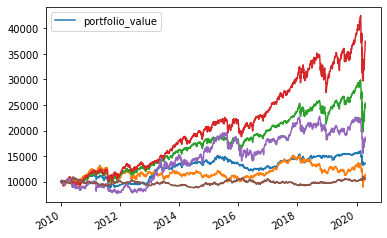

In [0]:
# Backtest Result Plotting
portfolio.plot()
for symbol in ['KS200', 'US500', 'IXIC', 'JP225', 'USD/KRW']:
  plt.plot(data[symbol] * 10000 / data[symbol][0])

plt.show()

#실습 4

### 앞서 구한 리밸런싱 포트폴리오의 Sharpe ratio, MDD를 구하고 plotting 하시오.

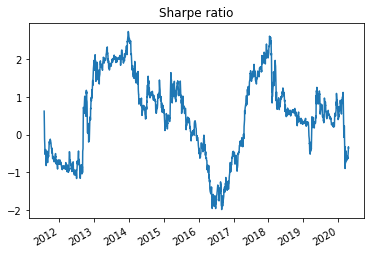

In [0]:
# Sharpe Ratio 계산

new_port = portfolio
new_port['returns'] = new_port['portfolio_value'].pct_change(1)

# Input y에 대해 Sharpe ratio를 구해주는 함수. Sharpe ratio = mean / std 를 연환산해주면 된다.
def my_rolling_sharpe(y):
    return "??""
# Calculate rolling Sharpe ratio
new_port['rs'] = new_port['returns'].rolling(252).apply(my_rolling_sharpe)

new_port['rs'].plot()
plt.title('Sharpe ratio')
plt.show()

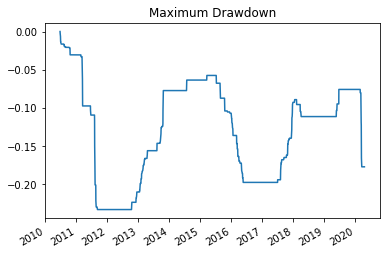

In [0]:
# Maximum Drawdown 계산
# Drawdown이란? 저점과 고점 사이 비율.
# Maximum Drawdown이란? 새 고점에 도달하기 전까지 Drawdown

# 252일을 window로 삼아 MDD를 구해준다.
window = 252

# 이전 252일 중 고점의 값을 Roll_Max에 저장한다.
# Pandas Series.rolling 사용
Roll_Max = portfolio['portfolio_value']."??"

# 현재 값과 고점의 비율을 구하여 Daily_Drawdown에 저장한다.
Daily_Drawdown = portfolio['portfolio_value']/Roll_Max - 1.0

# 이전 252일 중 Daily_Drawdown의 최소값을 Max_Daily_Drawdown에 저장한다.
Max_Daily_Drawdown = Daily_Drawdown."??"

# Plot the results
Max_Daily_Drawdown.plot()
plt.title('Maximum Drawdown')
plt.show()